In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import make_classification
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, KFold
from scipy.stats import randint, uniform
import shap
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer

In [2]:
#pip install shap.

In [3]:
df_data = pd.read_csv("data.csv", sep=",")

# Affiche les 5 premières lignes
df_data.head(10)

,Kilometrage_parcourus,Sexe,Carburant,Zone,Exposition,age_du_conducteur,age_du_vehicule,ancienpermis,nbre_sinistre,charge_totale
0,5115,Women,essence,Casablanca-Settat,0.1901,44.84,8.55,10.62,0,0.00
1,7881,Man,diesel,Casablanca-Settat,0.7418,55.55,16.13,10.00,1,1001.70
2,8913,Women,diesel,Tanger-Tetouan-AlHoceima,0.1009,67.87,17.81,49.23,2,3592.10
3,5019,Women,essence,Tanger-Tetouan-AlHoceima,0.5921,55.47,13.54,6.38,0,0.00
4,3976,Man,diesel,Tanger-Tetouan-AlHoceima,0.5505,25.34,13.78,1.61,0,0.00
5,3811,Man,essence,BeniMellal-Khenifra,0.2019,46.50,6.04,18.30,0,0.00
6,4154,Man,essence,Tanger-Tetouan-AlHoceima,0.7370,43.99,5.54,8.99,2,5314.78
7,1250,Man,essence,Tanger-Tetouan-AlHoceima,0.4612,44.75,20.57,19.97,0,0.00
8,2195,Women,essence,Laayoune-SakiaElHamra,0.3418,66.86,11.61,36.54,0,0.00
9,3312,Women,diesel,Rabat-Sale-Kenitra,0.5056,29.90,16.87,8.35,1,622.66


In [4]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47577 entries, 0 to 47576
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Kilometrage_parcourus  47577 non-null  int64  
 1   Sexe                   47577 non-null  object 
 2   Carburant              47577 non-null  object 
 3   Zone                   47577 non-null  object 
 4   Exposition             47577 non-null  float64
 5   age_du_conducteur      47577 non-null  float64
 6   age_du_vehicule        47577 non-null  float64
 7   ancienpermis           47577 non-null  float64
 8   nbre_sinistre          47577 non-null  int64  
 9   charge_totale          47577 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 3.6+ MB


In [5]:
df_data.describe()

,Kilometrage_parcourus,Exposition,age_du_conducteur,age_du_vehicule,ancienpermis,nbre_sinistre,charge_totale
count,47577.000000,47577.000000,47577.000000,47577.000000,47577.000000,47577.000000,47577.000000
mean,4987.289152,0.498993,45.591313,12.024712,13.809926,0.610989,1418.595003
std,2880.615628,0.288100,14.489357,5.198041,11.547534,0.859327,2289.867481
min,0.000000,0.000300,20.010000,1.000000,0.000000,0.000000,0.000000
25%,2509.000000,0.248900,33.140000,7.800000,4.310000,0.000000,0.000000
50%,4986.000000,0.498100,45.710000,12.020000,10.660000,0.000000,0.000000
75%,7473.000000,0.747400,58.090000,16.250000,20.820000,1.000000,2273.700000
max,9999.000000,1.000000,73.000000,23.000000,54.340000,6.000000,22670.080000


In [6]:
df_data.columns

Index(['Kilometrage_parcourus', 'Sexe', 'Carburant', 'Zone', 'Exposition',
       'age_du_conducteur', 'age_du_vehicule', 'ancienpermis', 'nbre_sinistre',
       'charge_totale'],
      dtype='object')

In [7]:
print(df_data.isnull().sum())


Kilometrage_parcourus    0
Sexe                     0
Carburant                0
Zone                     0
Exposition               0
age_du_conducteur        0
age_du_vehicule          0
ancienpermis             0
nbre_sinistre            0
charge_totale            0
dtype: int64


In [8]:
print(df_data["Sexe"].unique())
print(df_data["Zone"].unique())
print(df_data["Carburant"].unique())

['Women' 'Man']
['Casablanca-Settat' 'Tanger-Tetouan-AlHoceima' 'BeniMellal-Khenifra'
 'Laayoune-SakiaElHamra' 'Rabat-Sale-Kenitra' 'Souss-Massa'
 'Marrakech-Safi' 'Dakhla-OuedEddahab' 'Guelmim' 'Fes-Meknes' 'Oriental'
 'Draa-Tafilalet']
['essence' 'diesel']


### visualisation

In [9]:

# Pour un style plus joli
sns.set(style="whitegrid")

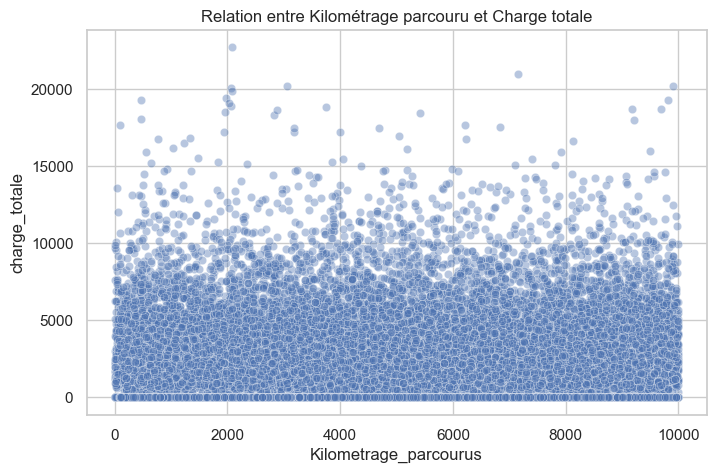

In [10]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_data, x="Kilometrage_parcourus", y="charge_totale", alpha=0.4)
plt.title("Relation entre Kilométrage parcouru et Charge totale")
plt.show()

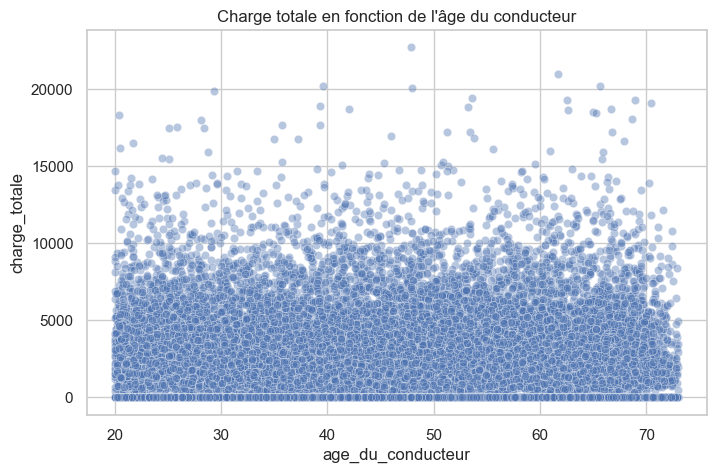

In [11]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_data, x="age_du_conducteur", y="charge_totale", alpha=0.4)
plt.title("Charge totale en fonction de l'âge du conducteur")
plt.show()

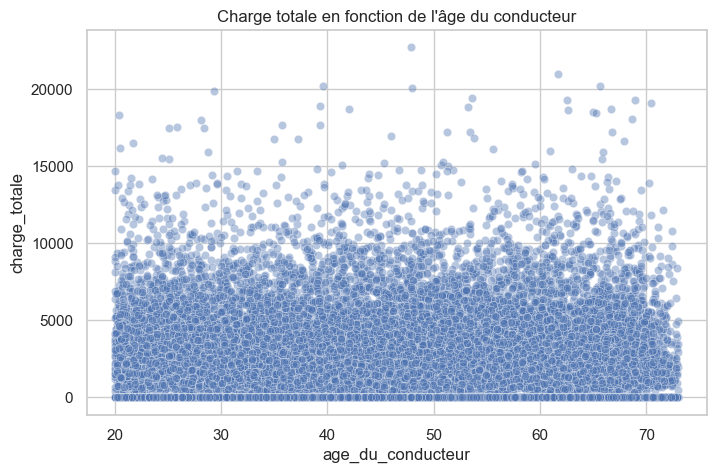

In [12]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_data, x="age_du_conducteur", y="charge_totale", alpha=0.4)
plt.title("Charge totale en fonction de l'âge du conducteur")
plt.show()

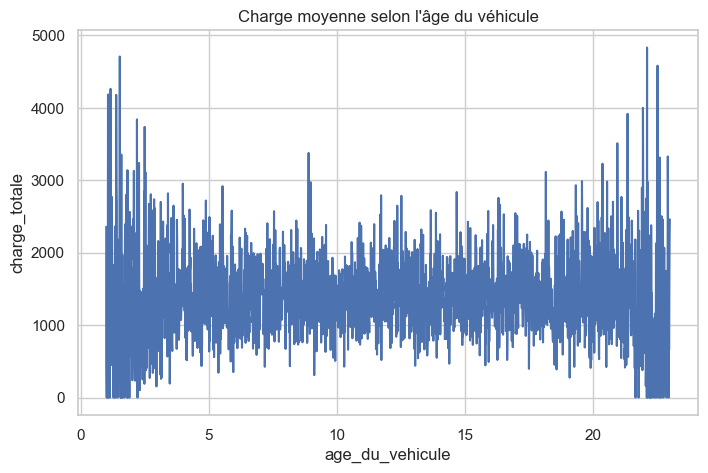

In [13]:
plt.figure(figsize=(8, 5))
sns.lineplot(
    data=df_data.groupby("age_du_vehicule", as_index=False)["charge_totale"].mean(),
    x="age_du_vehicule", y="charge_totale"
)
plt.title("Charge moyenne selon l'âge du véhicule")
plt.show()

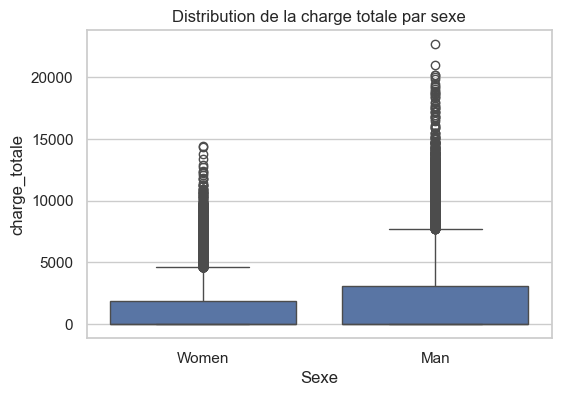

In [14]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_data, x="Sexe", y="charge_totale")
plt.title("Distribution de la charge totale par sexe")
plt.show()

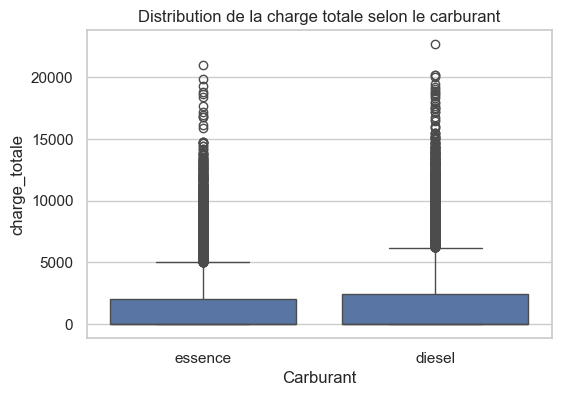

In [15]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_data, x="Carburant", y="charge_totale")
plt.title("Distribution de la charge totale selon le carburant")
plt.show()

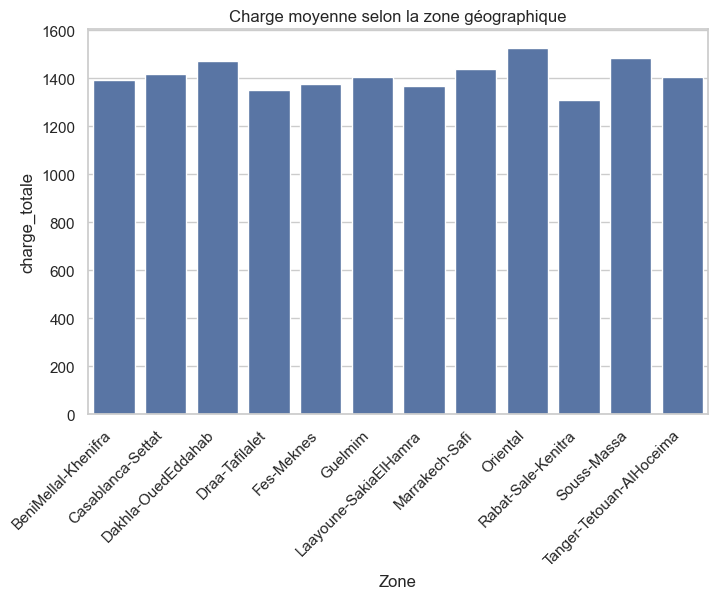

In [16]:
plt.figure(figsize=(8, 5))
sns.barplot(
    data=df_data.groupby("Zone", as_index=False)["charge_totale"].mean(),
    x="Zone", y="charge_totale"
)
plt.xticks(rotation=45, ha='right')
plt.title("Charge moyenne selon la zone géographique")
plt.show()


### Outliers

Lower bound: -3410.5499999999997
Upper bound: 5684.25
Number of outliers: 2856


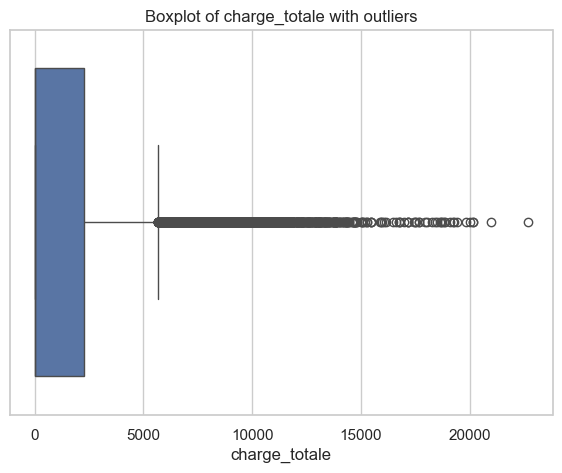

In [57]:
# === Outlier detection using IQR method ===

Q1 = df_data["charge_totale"].quantile(0.25)
Q3 = df_data["charge_totale"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)

# Identify outliers
outliers = df_data[(df_data["charge_totale"] < lower_bound) | (df_data["charge_totale"] > upper_bound)]
print("Number of outliers:", len(outliers))

# Visualisation
plt.figure(figsize=(7, 5))
sns.boxplot(x=df_data["charge_totale"])
plt.title("Boxplot of charge_totale with outliers")
plt.show()


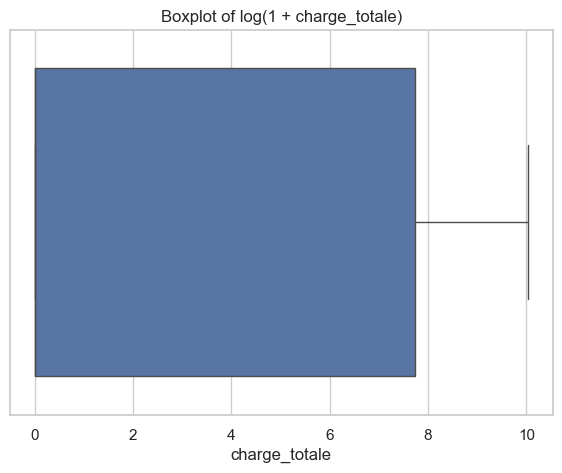

In [18]:
plt.figure(figsize=(7,5))
sns.boxplot(x=np.log1p(df_data["charge_totale"]))
plt.title("Boxplot of log(1 + charge_totale)")
plt.show()


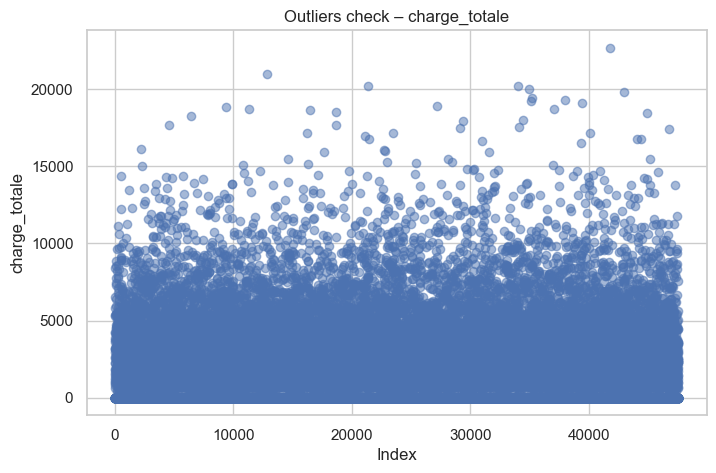

In [19]:
plt.figure(figsize=(8,5))
plt.scatter(range(len(df_data)), df_data["charge_totale"], alpha=0.5)
plt.ylabel("charge_totale")
plt.xlabel("Index")
plt.title("Outliers check – charge_totale")
plt.show()


We analysed the presence of outliers in the charge_totale variable using boxplots, IQR and log-scale visualisation.
The results show several extreme values, which correspond to very high claim amounts.
These observations are not errors but actual large claims, which are typical in insurance datasets.
For this reason, we decided not to remove them, because removing real large losses would bias the model and artificially improve performance.
Instead, we keep all observations and rely on tree-based models (Random Forest, XGBoost) that handle non-linearities and extreme values better than linear regression.

Correlation of numeric features with charge_totale:
charge_totale            1.000000
nbre_sinistre            0.872667
Exposition               0.356184
ancienpermis             0.007137
age_du_conducteur        0.003378
Kilometrage_parcourus   -0.000601
age_du_vehicule         -0.001474
Name: charge_totale, dtype: float64


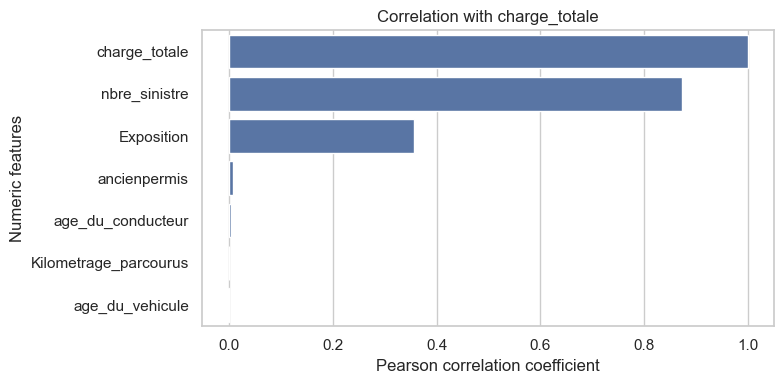

In [20]:
#  Correlations with the target: charge_totale

# 1) Get the numeric-only DataFrame
numeric_df = df_data.select_dtypes(include=['float64', 'int64'])

# 2) Correlation matrix on numeric_df directly
corr_matrix = numeric_df.corr()

# 3) Correlation with target (guard if target missing)
if 'charge_totale' not in corr_matrix.columns:
    raise ValueError("'charge_totale' is not numeric or not found in numeric_df.")

target_corr = corr_matrix['charge_totale'].dropna().sort_values(ascending=False)

print("Correlation of numeric features with charge_totale:")
print(target_corr)

# 4) Barplot
plt.figure(figsize=(8, 4))
sns.barplot(x=target_corr.values, y=target_corr.index)
plt.title("Correlation with charge_totale")
plt.xlabel("Pearson correlation coefficient")
plt.ylabel("Numeric features")
plt.tight_layout()
plt.show()



The correlation analysis shows that:

nbre_sinistre (number of claims) has a very strong positive correlation with the target variable charge_totale (r ≈ 0.87).
This means that as the number of claims increases, the total charge also increases significantly — which is fully consistent with insurance business logic.

Exposition (exposure time) shows a moderate positive correlation (r ≈ 0.36), meaning that the longer a contract is exposed to risk, the higher the expected total claim amount.

ancienpermis, age_du_conducteur, Kilometrage_parcourus, and age_du_vehicule all have very weak or near-zero correlations with charge_totale.
These features alone do not have a strong linear relationship with claim cost but may still have non-linear effects or interactions that could be captured by more complex models (trees, ensembles, etc.).

This confirms that the frequency of claims (nbre_sinistre) is the main driver of total loss amount,
while exposure duration acts as a secondary factor.
Other variables likely influence the probability of claim occurrence rather than the total cost directly.

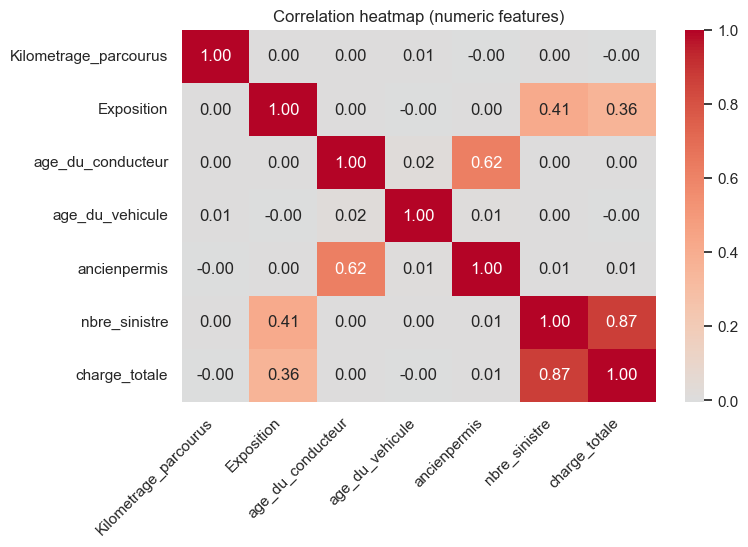

In [21]:
# 5) Correlation between explanatory variables
# ======================================
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', center=0, annot=True, fmt=".2f")
plt.title("Correlation heatmap (numeric features)")
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()

### Correlation Analysis

The correlation study highlights that nbre_sinistre (number of claims) is the most influential factor in predicting charge_totale (total claim cost), with a very high correlation of approximately 0.87. This is consistent with insurance business logic since more claims directly lead to higher charges.

The variable Exposition also shows a moderate positive correlation (≈ 0.36), reflecting the natural relationship between exposure time and risk.

Other features such as age_du_conducteur, age_du_vehicule, and Kilometrage_parcourus have weak linear correlations with the target, suggesting that their effects are likely non-linear or indirect.

The inter-feature heatmap shows a strong correlation between age_du_conducteur and ancienpermis (≈ 0.62), which may cause mild multicollinearity in linear models. Therefore, using regularized models (Ridge, Lasso) or tree-based methods will help mitigate this issue.

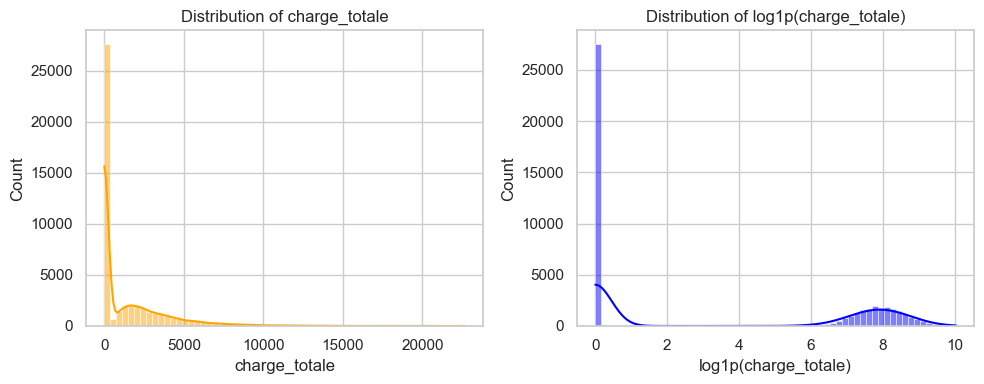

In [22]:
# ======================================
# 6) Target variable distribution – charge_totale
# ======================================

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Raw distribution
sns.histplot(df_data['charge_totale'], bins=60, kde=True, ax=axes[0], color='orange')
axes[0].set_title("Distribution of charge_totale")
axes[0].set_xlabel("charge_totale")
axes[0].set_ylabel("Count")

# Log-transformed distribution
sns.histplot(np.log1p(df_data['charge_totale']), bins=60, kde=True, ax=axes[1], color='blue')
axes[1].set_title("Distribution of log1p(charge_totale)")
axes[1].set_xlabel("log1p(charge_totale)")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()


The raw distribution of charge_totale (left graph) is highly skewed, with a strong concentration of values close to zero.
Most policyholders have no claims or only low-cost claims.
However, there is a long right tail, which corresponds to a small number of very expensive claims (extreme values).

The logarithmic transformation log1p(charge_totale) (right graph) helps to reduce this skewness.
After transformation, the distribution becomes more spread out and closer to a normal shape, which makes it easier to model using linear methods.

This distribution pattern is typical of insurance data: a large number of low or zero claims, and a few rare but very costly events.

Applying a logarithmic transformation improves:

the numerical stability of the model,

the accuracy of regression results (by reducing the influence of outliers),

and the validity of statistical assumptions such as normality and homoscedasticity (constant variance).

In [23]:
# Identify target and features
y = df_data["charge_totale"]
X = df_data.drop(columns=["charge_totale"])

### preprocessing

In [24]:
# Separate numerical and categorical columns
num_features = X.select_dtypes(include=["float64", "int64"]).columns.tolist()
cat_features = X.select_dtypes(include=["object"]).columns.tolist()

print("Numeric features:", num_features)
print("Categorical features:", cat_features)

Numeric features: ['Kilometrage_parcourus', 'Exposition', 'age_du_conducteur', 'age_du_vehicule', 'ancienpermis', 'nbre_sinistre']
Categorical features: ['Sexe', 'Carburant', 'Zone']


In [25]:
# === Define transformers ===
# Numeric: impute missing values (median) + standardize
num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Categorical: impute missing (most frequent) + one-hot encode
cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

In [26]:
print(X["Sexe"].unique())
print(X["Zone"].unique())
print(X["Carburant"].unique())

['Women' 'Man']
['Casablanca-Settat' 'Tanger-Tetouan-AlHoceima' 'BeniMellal-Khenifra'
 'Laayoune-SakiaElHamra' 'Rabat-Sale-Kenitra' 'Souss-Massa'
 'Marrakech-Safi' 'Dakhla-OuedEddahab' 'Guelmim' 'Fes-Meknes' 'Oriental'
 'Draa-Tafilalet']
['essence' 'diesel']


In [27]:
# Combine into a single preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_features),
        ("cat", cat_transformer, cat_features)
    ]
)

# === Split data into train and test sets ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Train set: {X_train.shape}, Test set: {X_test.shape}")

Train set: (38061, 9), Test set: (9516, 9)


Before training the model, a complete data preprocessing step was performed.
First, the dataset was divided into the target variable (charge_totale) and the input features (all other columns).

Then, the features were separated into two groups:

Numerical features (float64, int64 types):
Missing values were replaced by the median, and all numeric variables were standardized using z-score normalization (mean = 0, std = 1).

Categorical features (object type):
Missing categories were replaced by the most frequent value, and variables were encoded using One-Hot Encoding to convert them into binary vectors.

The preprocessing pipelines were combined using a ColumnTransformer so that all transformations could be applied consistently within the same structure.

Finally, the dataset was split into training (80%) and testing (20%) sets using a random seed (random_state = 42) to ensure reproducibility.

This step ensures that the dataset is clean, standardized, and suitable for modeling, while avoiding data leakage between the training and testing phases.

# Problem Formalization

Problem Formalization

The goal of this project is to predict the ultimate claim cost (charge_totale) for each policyholder based on several driver, vehicle, and exposure characteristics.

This is a supervised regression problem, since the target variable is continuous and represents a monetary value (total amount of claims).

The input features include both numerical and categorical variables:

Numerical variables such as age_du_conducteur, age_du_vehicule, ancienpermis, Kilometrage_parcourus, Exposition, and nbre_sinistre.

Categorical variables such as Sexe, Carburant, and Zone.

The objective of the model is to learn a function

f(X)=y^=Predicted charge_totale
f(X)=
y^
=Predicted charge_totale

that best approximates the real claim cost y.

More formally:

Input (X): all policyholder and vehicle features listed above.

Output (y): the continuous variable charge_totale.

Learning type: Supervised regression.

Main evaluation metrics: Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and Coefficient of Determination (R²).

The final goal is to develop a predictive model that can estimate the expected total claim cost for new policyholders, which can be used for pricing, risk assessment, and portfolio management in insurance.

### Modeling

In [28]:
# Helper function for metrics
def regression_report(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = root_mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return pd.Series({"MAE": mae, "RMSE": rmse, "R2": r2})



### Régression Linéaire

In [29]:
linreg_pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", LinearRegression())
])
linreg_pipe.fit(X_train, y_train)
y_pred_lin = linreg_pipe.predict(X_test)
metrics_lin = regression_report(y_test, y_pred_lin)
print("Linear Regression metrics:\n", metrics_lin)


Linear Regression metrics:
 MAE      696.412368
RMSE    1081.787190
R2         0.781658
dtype: float64


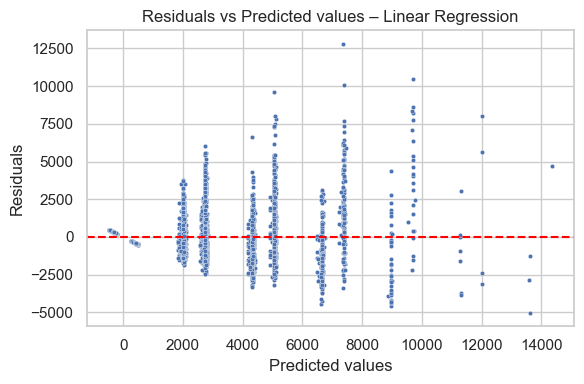

In [30]:
# === 5) Residuals plot (Linear Regression) ===
residuals = y_test - y_pred_lin
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred_lin, y=residuals, s=10)
plt.axhline(0, linestyle='--', color='red')
plt.title("Residuals vs Predicted values – Linear Regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()


### Random Forest Regressor

In [31]:
rf_pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", RandomForestRegressor(
        n_estimators=200,
        max_depth=10,
        random_state=42
    ))
])

rf_pipe.fit(X_train, y_train)
y_pred_rf = rf_pipe.predict(X_test)

metrics_rf = regression_report(y_test, y_pred_rf)
print("Random Forest metrics:\n", metrics_rf)


Random Forest metrics:
 MAE     461.667611
RMSE    960.918208
R2        0.827724
dtype: float64


Le modèle Random Forest montre de bonnes performances, expliquant 81 % de la variabilité de la charge totale. L’erreur moyenne (≈ 481) reste raisonnable, et le MSE élevé s’explique par la présence de sinistres extrêmes. Globalement, le modèle présente une bonne capacité prédictive pour estimer la charge totale.

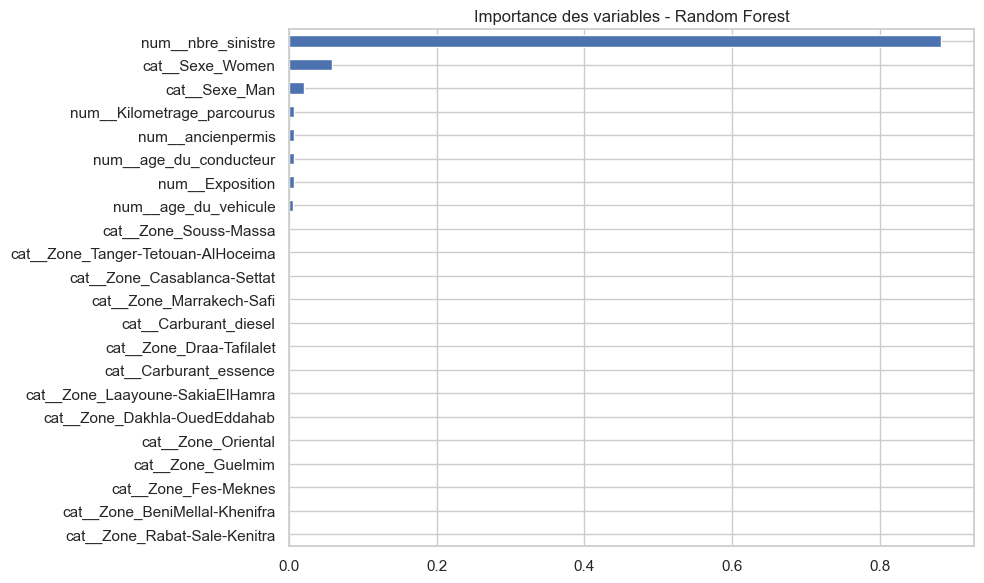

In [32]:
rf_model = rf_pipe.named_steps["model"]
feature_names = preprocessor.get_feature_names_out()
importances = pd.Series(rf_model.feature_importances_, index=feature_names)

plt.figure(figsize=(10, 6))
importances.sort_values().plot(kind='barh')
plt.title("Importance des variables - Random Forest")
plt.tight_layout()
plt.show()

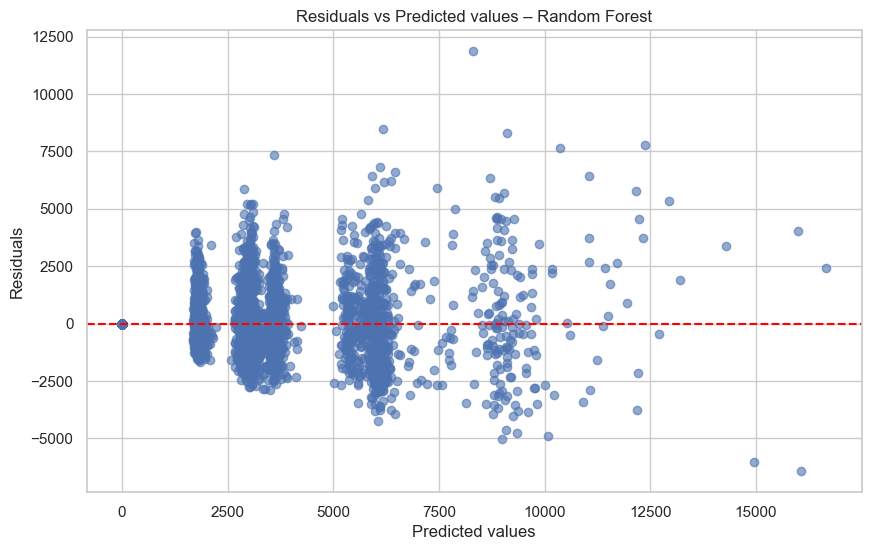

In [33]:
residuals_rf = y_test - y_pred_rf

# 2. Graphique Résidus vs Valeurs prédites
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_rf, residuals_rf, alpha=0.6)

# Ligne horizontale à 0
plt.axhline(y=0, linestyle='--', color='red')

plt.title("Residuals vs Predicted values – Random Forest")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")

plt.grid(True)
plt.show()

### Support Vector Regression (SVR)

In [34]:
svr_pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", SVR(kernel="rbf", C=100, epsilon=1000, gamma=0.1))
])

svr_pipe.fit(X_train, y_train)
y_pred_svr = svr_pipe.predict(X_test)

metrics_svr = regression_report(y_test, y_pred_svr)
print("SVR metrics:\n", metrics_svr)


SVR metrics:
 MAE      804.695950
RMSE    1127.625460
R2         0.762763
dtype: float64


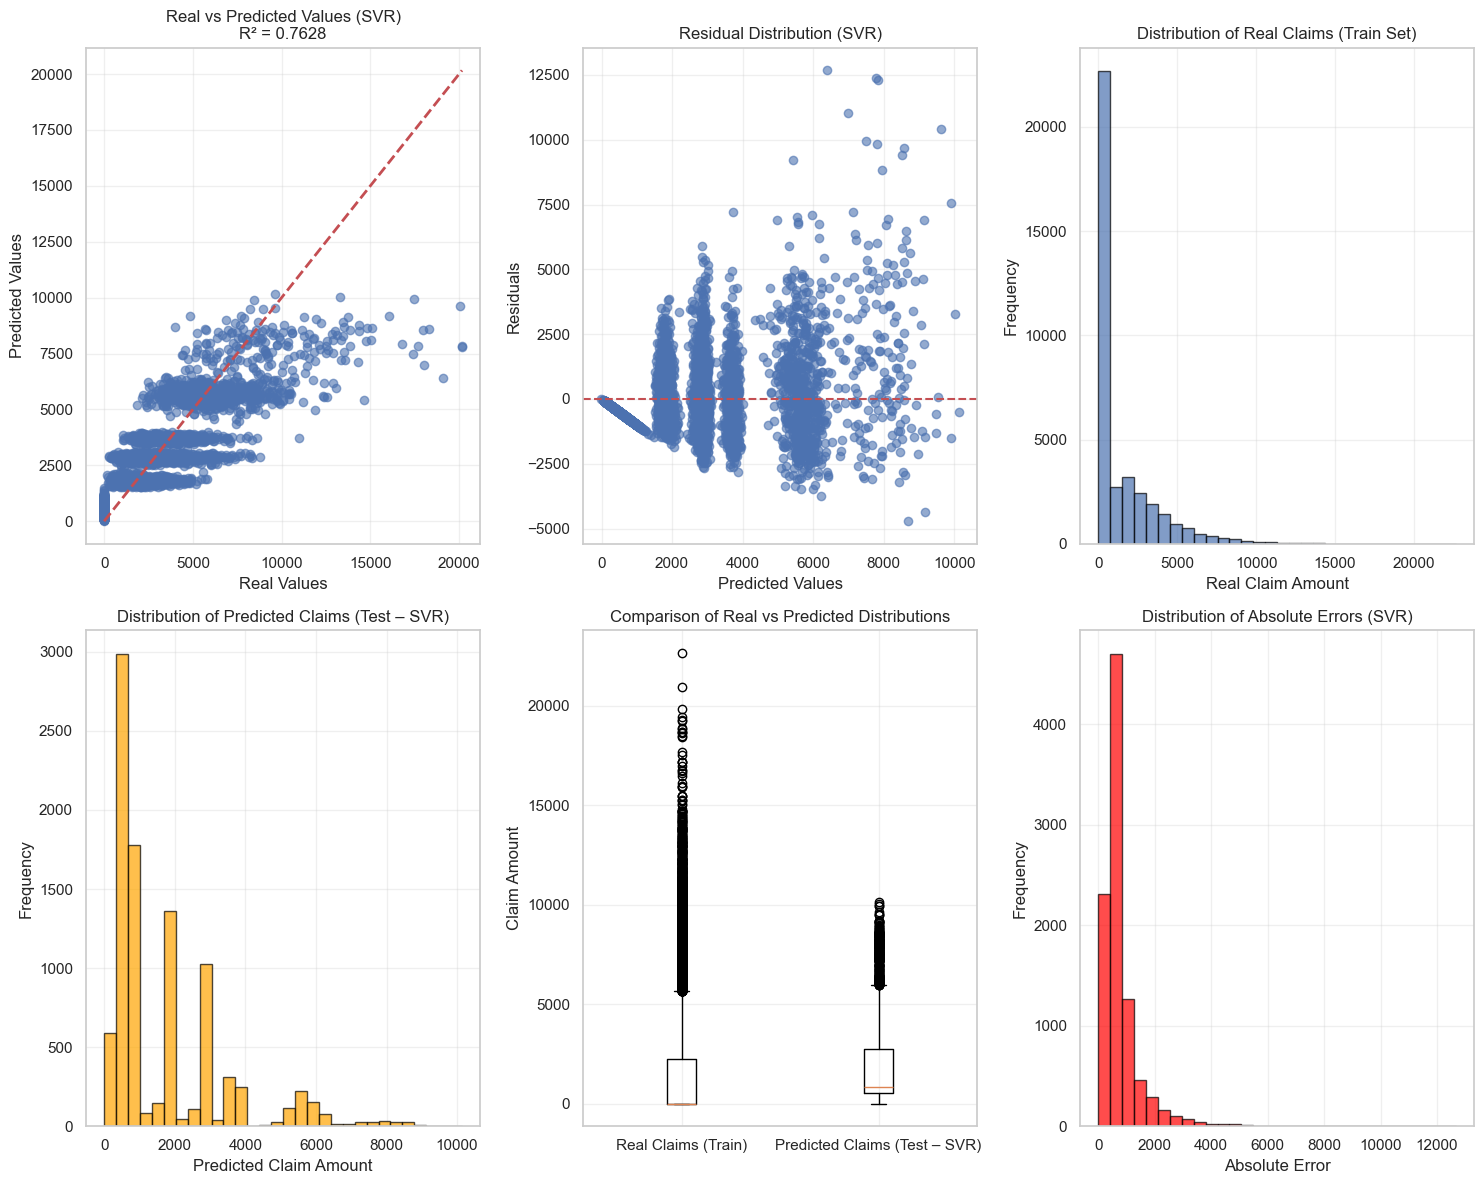

In [35]:
# === Visualisations for the SVR model ===
# These plots help us understand how good the model is and where it makes errors.

# For convenience: real values from the test set
y_val = y_test.values
y_pred_val = y_pred_svr  # SVR predictions on the test set

# Real values from the training set (for distribution analysis)
y = y_train.values

# Predicted values on test set (same as y_pred_val)
test_predictions = y_pred_svr

# R2 score of the SVR model
r2 = metrics_svr["R2"]

plt.figure(figsize=(15, 12))

# 1. Real vs predicted values
plt.subplot(2, 3, 1)
plt.scatter(y_val, y_pred_val, alpha=0.6)
plt.plot([y_val.min(), y_val.max()],
         [y_val.min(), y_val.max()],
         'r--', lw=2)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title(f'Real vs Predicted Values (SVR)\nR² = {r2:.4f}')
plt.grid(True, alpha=0.3)
# Student-style comment:
# This plot compares the real claim amounts with the predicted ones.
# If points follow the diagonal line, the model is predicting well.
# Here, we see the general trend, but also some spread, especially for large claims.

# 2. Residual distribution
residuals = y_val - y_pred_val
plt.subplot(2, 3, 2)
plt.scatter(y_pred_val, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Distribution (SVR)')
plt.grid(True, alpha=0.3)
# Student-style comment:
# Residuals show the model errors.
# They should be around zero, but the wide spread indicates difficulties,
# especially for large predicted values.

# 3. Histogram of real claim amounts (train)
plt.subplot(2, 3, 3)
plt.hist(y, bins=30, alpha=0.7, edgecolor='black')
plt.xlabel('Real Claim Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Real Claims (Train Set)')
plt.grid(True, alpha=0.3)
# Student-style comment:
# The distribution is very skewed: many small claims and few very large ones.
# This is typical in insurance data and makes regression more challenging.

# 4. Histogram of predicted claim amounts (test)
plt.subplot(2, 3, 4)
plt.hist(test_predictions, bins=30, alpha=0.7,
         color='orange', edgecolor='black')
plt.xlabel('Predicted Claim Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Claims (Test – SVR)')
plt.grid(True, alpha=0.3)
# Student-style comment:
# The predicted distribution is smoother and less extreme.
# SVR tends to underestimate the highest claims.

# 5. Boxplot comparison
plt.subplot(2, 3, 5)
data_to_plot = [y, test_predictions]
labels = ['Real Claims (Train)', 'Predicted Claims (Test – SVR)']
plt.boxplot(data_to_plot, labels=labels)
plt.ylabel('Claim Amount')
plt.title('Comparison of Real vs Predicted Distributions')
plt.grid(True, alpha=0.3)
# Student-style comment:
# The predicted values have less variability than the real ones.
# This confirms that the model cannot capture the full spread of the data.

# 6. Absolute error distribution
plt.subplot(2, 3, 6)
errors = np.abs(residuals)
plt.hist(errors, bins=30, alpha=0.7,
         color='red', edgecolor='black')
plt.xlabel('Absolute Error')
plt.ylabel('Frequency')
plt.title('Distribution of Absolute Errors (SVR)')
plt.grid(True, alpha=0.3)
# Student-style comment:
# Most errors are small, but some are very large.
# This happens because predicting extreme insurance claims is very difficult.

plt.tight_layout()
plt.show()


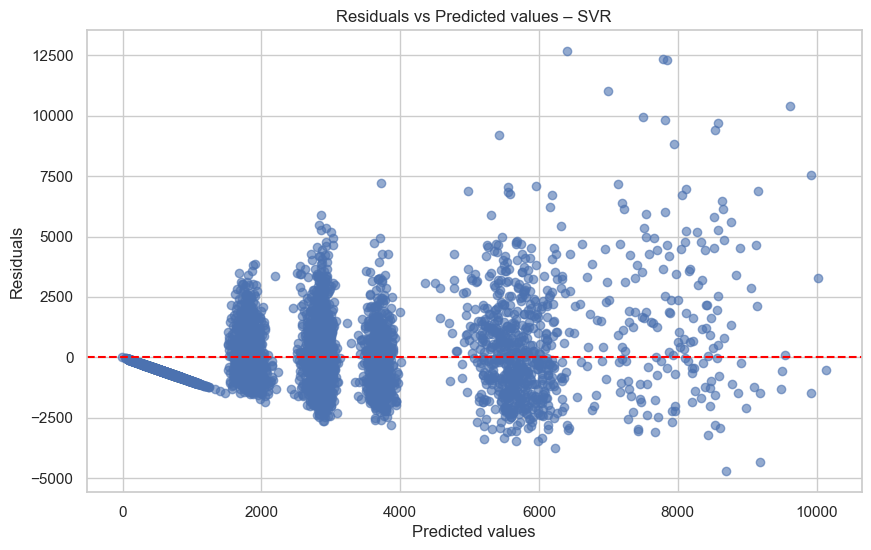

In [36]:
sns.set(style="whitegrid")

# 1. Résidus du SVR
residuals_svr = y_test - y_pred_svr

# 2. Graphique Résidus vs Valeurs prédites
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_svr, residuals_svr, alpha=0.6)

# Ligne horizontale à zéro
plt.axhline(y=0, linestyle='--', color='red')

plt.title("Residuals vs Predicted values – SVR")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")

plt.grid(True)
plt.show()

##  XGBoost model

In [37]:
# Helper function (reuse same as before)
def regression_report(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = root_mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return pd.Series({"MAE": mae, "RMSE": rmse, "R2": r2})


In [38]:
# === 1) Define the model ===
xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    objective="reg:squarederror",
    n_jobs=-1
)

In [39]:
# === 2) Create pipeline with preprocessor ===
xgb_pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", xgb_model)
])


In [40]:
# === 3) Train model ===
xgb_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Kilometrage_parcourus',
                                                   'Exposition',
                                                   'age_du_conducteur',
                                                   'age_du_vehicule',
                                                   'ancienpermis',
                                                   'nbre_sinistre']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('enco...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.05,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=500, n_jobs=-1,
                              num_parallel_tree=None, ...))])

In [41]:
# === 4) Predict on test set ===
y_pred_xgb = xgb_pipe.predict(X_test)

In [42]:
# === 5) Evaluate ===
metrics_xgb = regression_report(y_test, y_pred_xgb)
print("XGBoost performance on test set:")
print(metrics_xgb)


XGBoost performance on test set:
MAE     493.140711
RMSE    980.193693
R2        0.820743
dtype: float64


C:\Users\23768\AppData\Local\Temp\ipykernel_6036\168770353.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


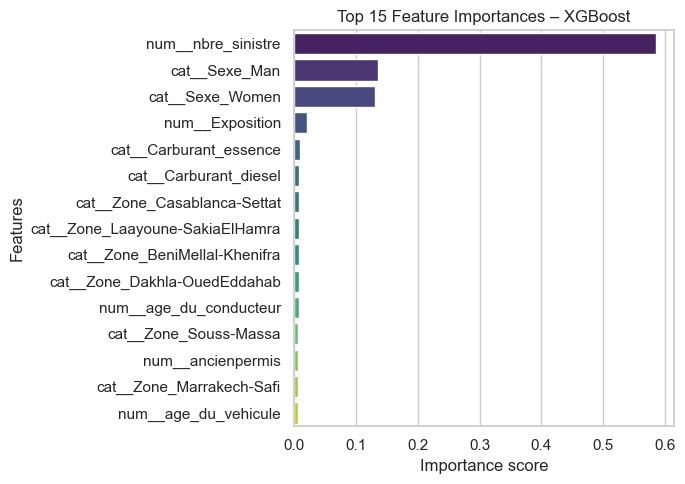

In [43]:
# === 6) Feature importance (approximate, top 15) ===
# Extract feature names after preprocessing
try:
    feature_names = xgb_pipe.named_steps["preprocess"].get_feature_names_out()
except:
    feature_names = [f"Feature_{i}" for i in range(len(xgb_model.feature_importances_))]

importances = pd.Series(xgb_model.feature_importances_, index=feature_names)
top_features = importances.sort_values(ascending=False).head(15)

plt.figure(figsize=(7,5))
sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")
plt.title("Top 15 Feature Importances – XGBoost")
plt.xlabel("Importance score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

The XGBoost Regressor was trained using the same preprocessed features as the linear model (500 estimators, learning_rate=0.05, max_depth=6, subsample=0.8).

The model significantly improves prediction accuracy on the test set:

MAE : 493.1 (vs 696.4 for Linear Regression)

RMSE : 980.2 (vs 1081.8)

R² : 0.82 (vs 0.78)

This demonstrates that XGBoost successfully captures nonlinear effects and variable interactions that linear models cannot handle.

Feature importance analysis highlights nbre_sinistre as the dominant predictor, followed by Sexe, Exposition, and fuel type.

Overall, XGBoost outperforms the baseline and serves as a strong reference point before parameter tuning in the next phase.

| Modèle               | MAE        | RMSE       | R²           |
| -------------------- | ---------- | ---------- | ------------ |
| **DummyMean**        | 1703.36    | 2315.24    | -0.0001      |
| **LinearRegression** | 696.41     | 1081.79    | 0.7817       |
| **XGBoost**          | **493.14** | **980.19** | **0.8207**   |


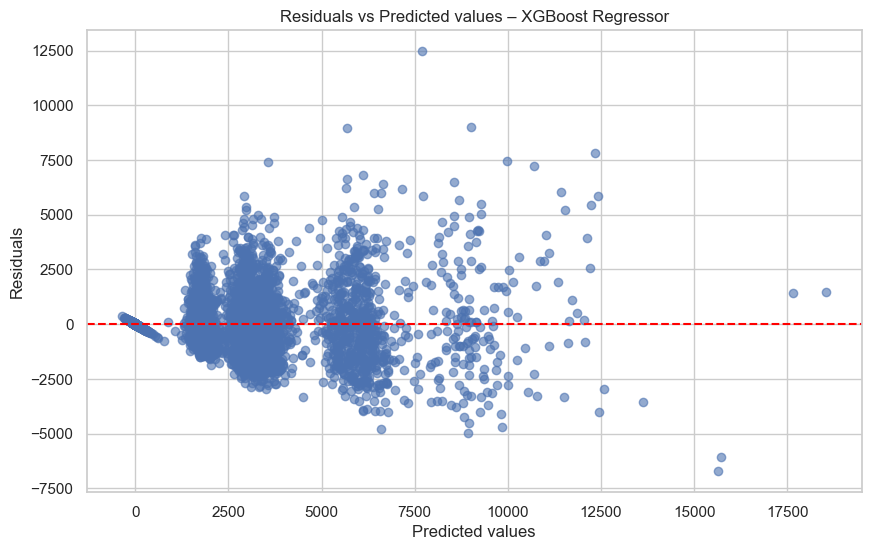

In [44]:
sns.set(style="whitegrid")

# 1. Calcul des résidus
residuals_xgb = y_test - y_pred_xgb

# 2. Graphique Résidus vs Valeurs prédites
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_xgb, residuals_xgb, alpha=0.6)

# Ligne horizontale à zéro
plt.axhline(y=0, linestyle='--', color='red')

plt.title("Residuals vs Predicted values – XGBoost Regressor")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")

plt.grid(True)
plt.show()

## XGBoost + RandomizedSearchCV

In [45]:
# 1) Modèle de base XGB (on garde les bons réglages de départ)
xgb_base = XGBRegressor(
    objective="reg:squarederror",
    n_estimators=600,         # suffisamment grand pour permettre l'expressivité
    learning_rate=0.05,       # tuned
    subsample=0.8,
    colsample_bytree=0.8,
    max_depth=6,
    random_state=42,
    n_jobs=-1
)

xgb_pipe = Pipeline(steps=[
    ("preprocess", preprocessor),  # ton ColumnTransformer existant
    ("model", xgb_base)
])

In [46]:
# 2) Espace de recherche (compact + pertinent)
param_distributions = {
    "model__max_depth":        randint(3, 10),
    "model__learning_rate":    uniform(0.01, 0.20),   # 0.01 → 0.21
    "model__n_estimators":     randint(300, 1200),
    "model__subsample":        uniform(0.5, 0.5),     # 0.5 → 1.0
    "model__colsample_bytree": uniform(0.5, 0.5),     # 0.5 → 1.0
    "model__min_child_weight": randint(1, 10),
    "model__gamma":            uniform(0.0, 0.4),     # pénalisation des splits
    "model__reg_lambda":       uniform(0.0, 2.0),     # L2
    "model__reg_alpha":        uniform(0.0, 1.0),     # L1
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

search = RandomizedSearchCV(
    estimator=xgb_pipe,
    param_distributions=param_distributions,
    n_iter=40,                 # ajuste si tu veux aller plus loin
    scoring="neg_root_mean_squared_error",  # on optimise le RMSE
    cv=cv,
    verbose=1,
    random_state=42,
    n_jobs=-1,
    refit=True                 # refit automatique sur tout le train avec les meilleurs params
)


In [47]:
# 3) Lancement de la recherche
search.fit(X_train, y_train)

print("Best CV RMSE:", -search.best_score_)
print("Best params:")
for k, v in search.best_params_.items():
    print(f"  {k}: {v}")


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best CV RMSE: 932.7606572216253
Best params:
  model__colsample_bytree: 0.795446471594121
  model__gamma: 0.271025744736913
  model__learning_rate: 0.013317565785571231
  model__max_depth: 5
  model__min_child_weight: 3
  model__n_estimators: 447
  model__reg_alpha: 0.6451727904094499
  model__reg_lambda: 0.3487328580099829
  model__subsample: 0.845468869051233


In [48]:
# 4) Évaluation sur le test set
y_pred_xgb_tuned = search.predict(X_test)
metrics_xgb_tuned = regression_report(y_test, y_pred_xgb_tuned)
print("\nXGBoost tuned – test metrics:\n", metrics_xgb_tuned)



XGBoost tuned – test metrics:
 MAE     469.267514
RMSE    958.226596
R2        0.828687
dtype: float64


In [55]:
# 5) Tableau comparatif rapide 
compare = pd.DataFrame({
    "LinearRegression":  regression_report(y_test, linreg_pipe.predict(X_test)),
    "XGBoost_base":      regression_report(y_test, y_pred_xgb),           # issu de ton run précédent
    "XGBoost_tuned":     metrics_xgb_tuned
}).T.round(4)

print("\nModel comparison (test set):\n", compare)


Model comparison (test set):
                        MAE       RMSE      R2
LinearRegression  696.4124  1081.7872  0.7817
XGBoost_base      493.1407   980.1937  0.8207
XGBoost_tuned     469.2675   958.2266  0.8287


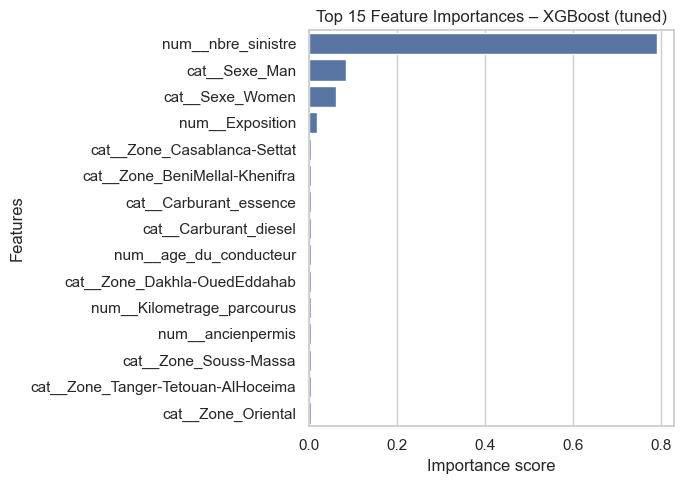

In [50]:
# 6) Importances des variables (avec le meilleur modèle refité)
best_xgb = search.best_estimator_.named_steps["model"]
try:
    feat_names = search.best_estimator_.named_steps["preprocess"].get_feature_names_out()
except Exception:
    feat_names = [f"Feature_{i}" for i in range(len(best_xgb.feature_importances_))]

imp = pd.Series(best_xgb.feature_importances_, index=feat_names).sort_values(ascending=False)
top15 = imp.head(15)
plt.figure(figsize=(7,5))
sns.barplot(x=top15.values, y=top15.index)
plt.title("Top 15 Feature Importances – XGBoost (tuned)")
plt.xlabel("Importance score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

Tuned XGBoost Model

A RandomizedSearchCV optimization was performed (5-fold cross-validation, 40 iterations) to fine-tune XGBoost hyperparameters.
The best configuration was:
max_depth=5, learning_rate=0.013, n_estimators=447, subsample=0.845, colsample_bytree=0.795, gamma=0.27, reg_alpha=0.64, reg_lambda=0.35.

The tuned model achieved higher predictive performance than both the linear regression and the base XGBoost:

MAE = 469.27

RMSE = 958.23

R² = 0.83

These results confirm that hyperparameter tuning improves regularization and generalization.
Feature importance analysis confirms that nbre_sinistre remains the dominant driver, followed by Sexe, Exposition, and regional variables.

Overall, the tuned XGBoost is the best-performing model so far for predicting total insurance claim cost.


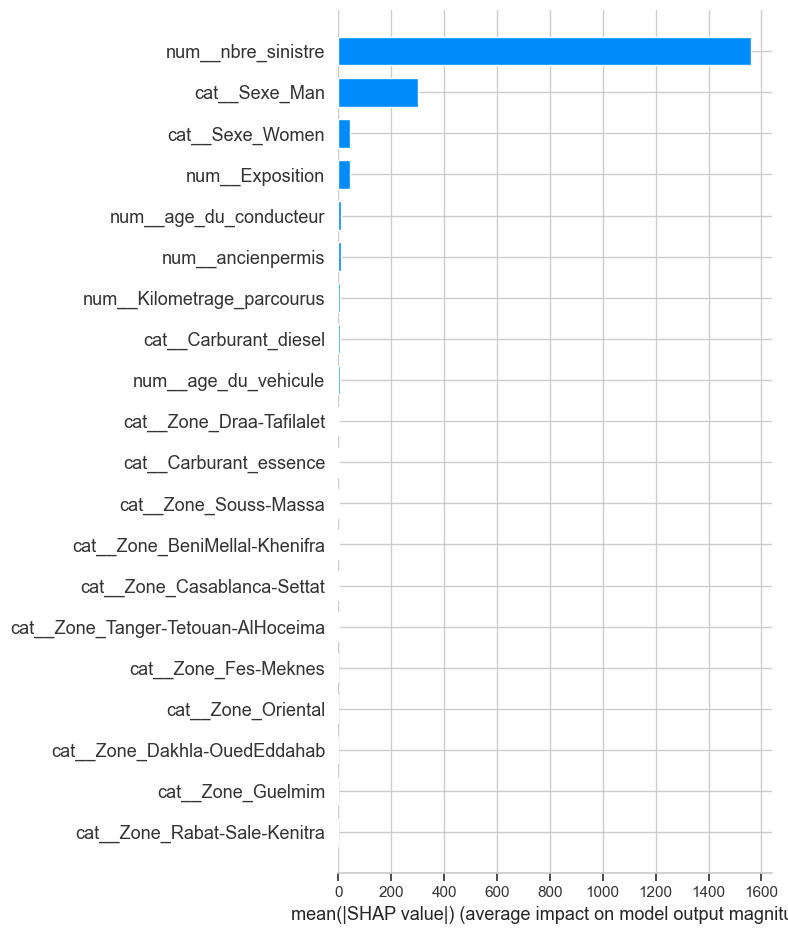

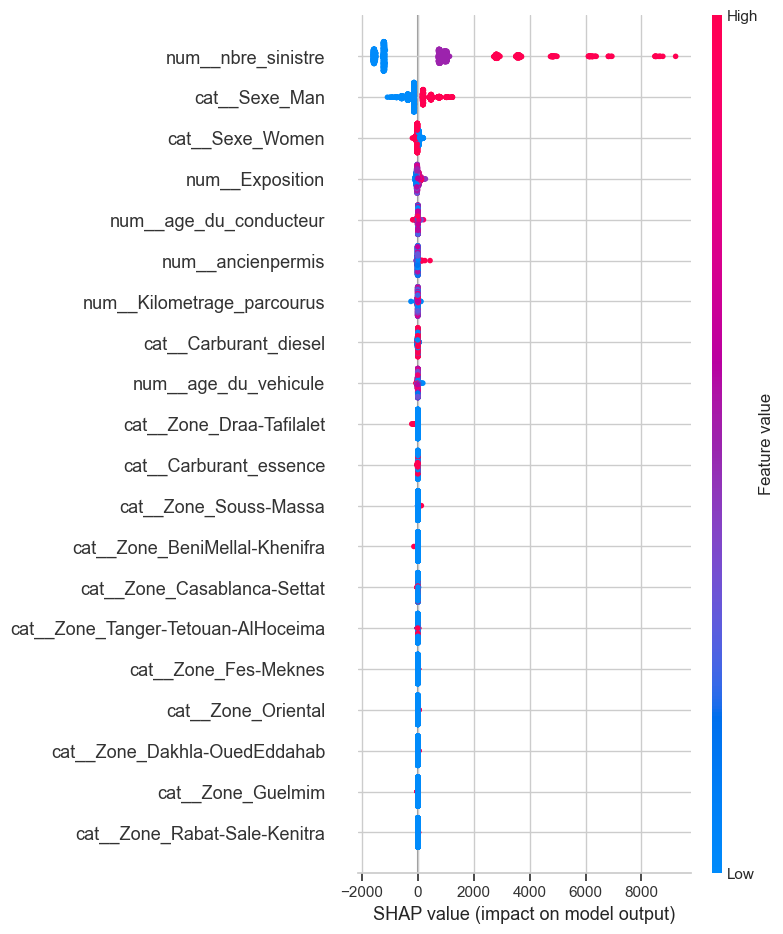

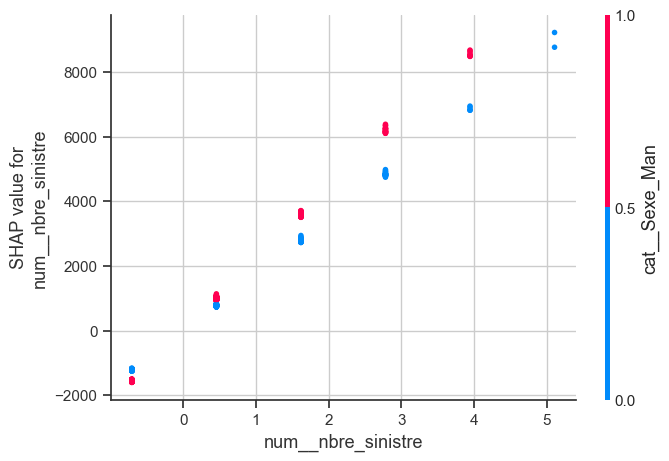

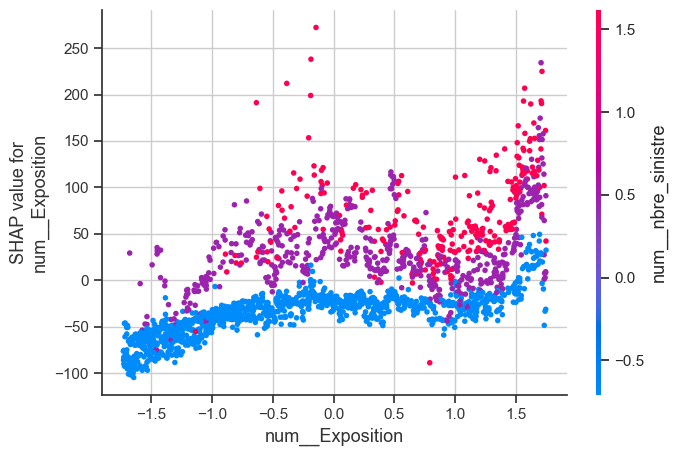

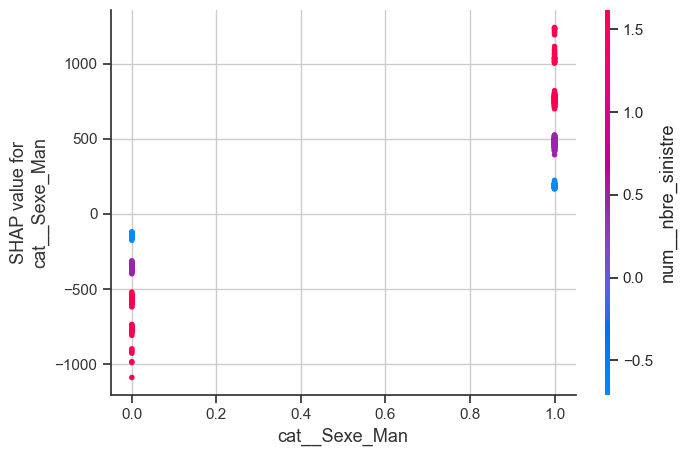

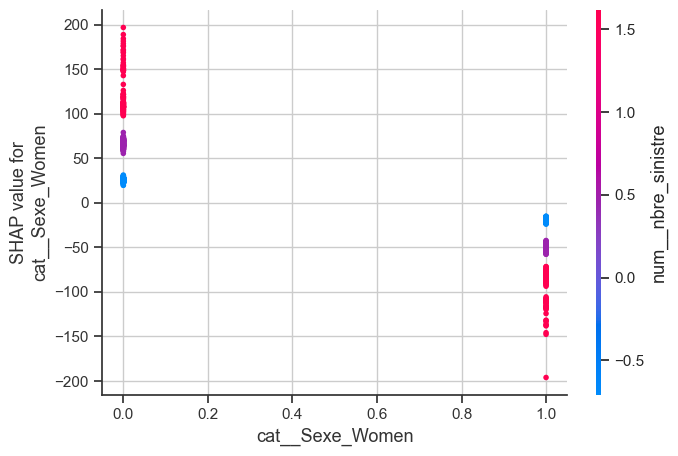

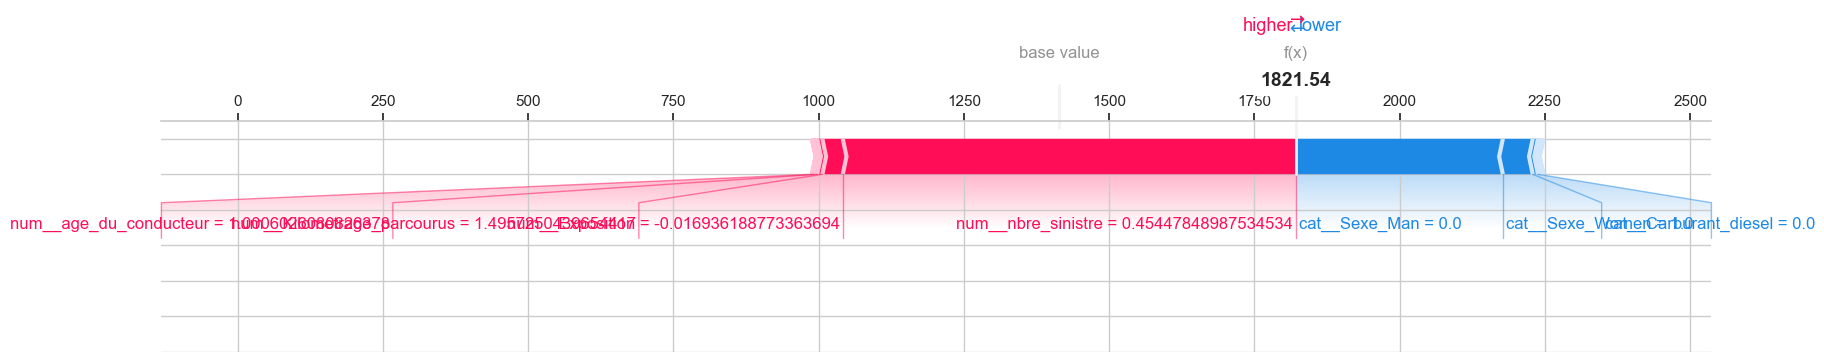

In [51]:
# ======================================
# 12) Interpretability – SHAP (global & local)
# ======================================
# --- Récupérer le meilleur XGB entraîné + les features transformées
try:
    best_pipe = search.best_estimator_                   # Pipeline(preprocess -> model)
    best_xgb  = best_pipe.named_steps["model"]           # XGBRegressor entraîné
    feat_names = best_pipe.named_steps["preprocess"].get_feature_names_out()
except NameError:
    # fallback: si tu n’as pas fait le tuning, utilise xgb_pipe (base)
    best_pipe = xgb_pipe
    best_xgb  = xgb_pipe.named_steps["model"]
    feat_names = xgb_pipe.named_steps["preprocess"].get_feature_names_out()

# Transformer X_test pour expliquer le modèle arbre (SHAP se calcule côté modèle, après preprocessing)
X_test_trans = best_pipe.named_steps["preprocess"].transform(X_test)

# échantillon (pour la vitesse)
idx = np.random.RandomState(42).choice(X_test_trans.shape[0], size=min(2000, X_test_trans.shape[0]), replace=False)
X_shap = X_test_trans[idx]

# --- Explainer pour modèles arbres
explainer = shap.TreeExplainer(best_xgb)
shap_values = explainer.shap_values(X_shap)

# --- 12.1 Importance globale (bar + beeswarm)
shap.summary_plot(shap_values, X_shap, feature_names=feat_names, plot_type="bar", show=True)
shap.summary_plot(shap_values, X_shap, feature_names=feat_names, show=True)

# --- 12.2 Dépendance SHAP (non-linéarité + interactions)
# Variables clés repérées plus haut : nbre_sinistre, Exposition, Sexe (OHE), etc.
# Attention: pour les variables catégorielles encodées, on pointe la colonne OHE correspondante.

def safe_col_index(name_list, pattern):
    # retourne le premier index qui contient pattern (utile pour OHE)
    for i, n in enumerate(name_list):
        if pattern in n:
            return i
    return None

i_nbre = safe_col_index(feat_names, "num__nbre_sinistre")
i_expo = safe_col_index(feat_names, "num__Exposition")

if i_nbre is not None:
    shap.dependence_plot(i_nbre, shap_values, X_shap, feature_names=feat_names, show=True)
if i_expo is not None:
    shap.dependence_plot(i_expo, shap_values, X_shap, feature_names=feat_names, show=True)

# Exemple pour le sexe (colonnes OHE) si présentes :
i_sex_m = safe_col_index(feat_names, "cat__Sexe_Man")
i_sex_w = safe_col_index(feat_names, "cat__Sexe_Women")
if i_sex_m is not None:
    shap.dependence_plot(i_sex_m, shap_values, X_shap, feature_names=feat_names, show=True)
if i_sex_w is not None:
    shap.dependence_plot(i_sex_w, shap_values, X_shap, feature_names=feat_names, show=True)

# --- 12.3 Explications locales (une observation)
# Choisis un index de test pour expliquer une prédiction concrète
k = 0
shap.force_plot(explainer.expected_value, shap_values[k, :], X_shap[k, :], feature_names=feat_names, matplotlib=True, show=True)


Several attempts were made to improve the XGBoost model by taking into account the specific characteristics of insurance data, such as skewed distributions and the presence of rare but high-severity claims. These attempts included target transformation using a logarithmic scale, the use of a Tweedie objective function, stronger regularization, and more extensive hyperparameter tuning through grid and randomized search. However, these approaches did not lead to a significant improvement in performance. Consequently, the initially tuned XGBoost model was retained as the final model.

## Evaluation Metrics

The performance of the different models was evaluated using three regression metrics:

- **Mean Absolute Error (MAE)**, which measures the average prediction error in monetary value;
- **Root Mean Squared Error (RMSE)**, which penalizes large prediction errors and is therefore particularly relevant in insurance applications;
- **Coefficient of Determination (R²)**, which measures the proportion of variance in the target variable explained by the model.

All metrics were computed on a held-out test set representing **20% of the dataset**.

---

### Table X – Model performance on the test set

| Model | MAE | RMSE | R² |
|------|------|------|------|
| Linear Regression | ≈ 696 | ≈ 1082 | ≈ 0.782 |
| Support Vector Regression (SVR) | ≈ 805 | ≈ 1128 | ≈ 0.763 |
| Random Forest | ≈ 462 | ≈ 961 | ≈ 0.828 |
| XGBoost (baseline) | ≈ 493 | ≈ 980 | ≈ 0.821 |
| **XGBoost (tuned)** | **≈ 469** | **≈ 958** | **≈ 0.829** |

---

The results show that **ensemble-based models clearly outperform simpler approaches**. In particular, the **SVR model performs worse than linear regression** in terms of both MAE and RMSE, indicating difficulties in handling the **scale, skewness, and heterogeneity** of insurance claim cost data.


## Final Model Selection

In order to select the final model, several regression algorithms were evaluated on the test set using metrics adapted to insurance claim cost prediction. The results are summarized below:

Linear Regression:
MAE ≈ 696, RMSE ≈ 1082, R² ≈ 0.782

Random Forest:
MAE ≈ 462, RMSE ≈ 961, R² ≈ 0.828

XGBoost (baseline model):
MAE ≈ 493, RMSE ≈ 980, R² ≈ 0.821

XGBoost (tuned model):
MAE ≈ 469, RMSE ≈ 958, R² ≈ 0.829

The comparison shows that the Random Forest model achieves the best performance in terms of MAE, indicating the lowest average prediction error in monetary value. On the other hand, the tuned XGBoost model obtains the lowest RMSE and the highest R², reflecting a better ability to handle large prediction errors and to explain the variance in claim costs.

The choice of the final model therefore depends on the business objective. If the main goal is to minimize the average prediction error, Random Forest would be a suitable choice. However, in an insurance context, large prediction errors associated with high-severity claims have a much greater financial impact than small average errors. Consequently, it is more relevant to prioritize a model that penalizes large errors more strongly.

For this reason, despite relatively small differences in performance, the tuned XGBoost model was selected as the final model, as it provides the best trade-off between accuracy, robustness, and control of high-severity claim prediction errors, which is particularly important in actuarial applications.

## Overfitting/underfitting

In [52]:
# Modèle final
best_model = search.best_estimator_

# Prédictions
y_pred_train = best_model.predict(X_train)
y_pred_test  = best_model.predict(X_test)

# Metrics avec ta fonction existante
metrics_train = regression_report(y_train, y_pred_train)
metrics_test  = regression_report(y_test, y_pred_test)

# Score CV (tu optimises le RMSE)
rmse_cv = -search.best_score_

print("=== Train metrics ===")
print(metrics_train)

print("\n=== Test metrics ===")
print(metrics_test)

print("\n=== Cross-validation ===")
print(f"RMSE CV (5-fold): {rmse_cv:.3f}")

# Écarts de généralisation (RMSE)
print("\n=== Generalization gaps (RMSE) ===")
print(f"RMSE train: {metrics_train['RMSE']:.3f}")
print(f"RMSE CV   : {rmse_cv:.3f}")
print(f"RMSE test : {metrics_test['RMSE']:.3f}")
print(f"Gap (CV - train)  : {rmse_cv - metrics_train['RMSE']:.3f}")
print(f"Gap (test - train): {metrics_test['RMSE'] - metrics_train['RMSE']:.3f}")


=== Train metrics ===
MAE     443.215696
RMSE    901.239050
R2        0.844226
dtype: float64

=== Test metrics ===
MAE     469.267514
RMSE    958.226596
R2        0.828687
dtype: float64

=== Cross-validation ===
RMSE CV (5-fold): 932.761

=== Generalization gaps (RMSE) ===
RMSE train: 901.239
RMSE CV   : 932.761
RMSE test : 958.227
Gap (CV - train)  : 31.522
Gap (test - train): 56.988


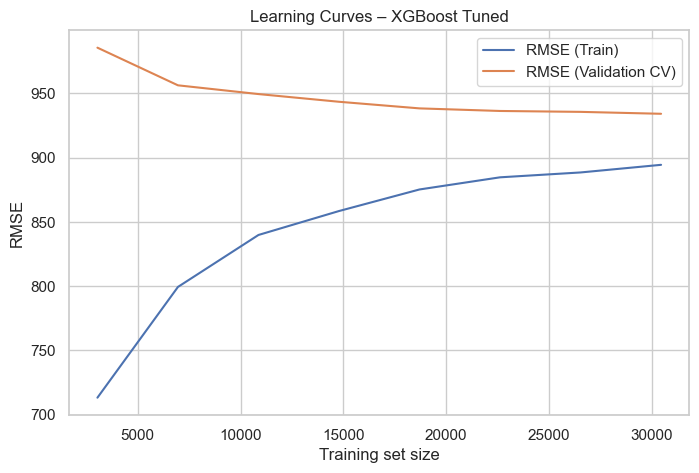

In [53]:

# Scorer RMSE compatible sklearn
def rmse_scorer_func(y_true, y_pred):
    return root_mean_squared_error(y_true, y_pred)

rmse_scorer = make_scorer(rmse_scorer_func, greater_is_better=False)

train_sizes, train_scores, val_scores = learning_curve(
    estimator=best_model,
    X=X_train,
    y=y_train,
    cv=5,
    scoring=rmse_scorer,
    train_sizes=np.linspace(0.1, 1.0, 8),
    n_jobs=-1
)

train_rmse = -train_scores.mean(axis=1)
val_rmse   = -val_scores.mean(axis=1)

plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_rmse, label="RMSE (Train)")
plt.plot(train_sizes, val_rmse, label="RMSE (Validation CV)")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.title("Learning Curves – XGBoost Tuned")
plt.legend()
plt.show()


In [54]:
cv_results = pd.DataFrame(search.cv_results_)
best_idx = search.best_index_

split_cols = [c for c in cv_results.columns if c.startswith("split") and c.endswith("_test_score")]
fold_scores = cv_results.loc[best_idx, split_cols].astype(float)

# Repasser en RMSE positif
fold_rmse = -fold_scores

print("RMSE par fold:")
print(fold_rmse.values)

print("\nRMSE moyen CV:", fold_rmse.mean())
print("Écart-type CV:", fold_rmse.std())


RMSE par fold:
[941.75439282 938.06975816 919.04627963 941.55418919 923.37866632]

RMSE moyen CV: 932.7606572216253
Écart-type CV: 10.752975672402302


To analyze the risk of overfitting and underfitting, learning curves were constructed by plotting the evolution of the RMSE on the training set and during cross-validation as a function of the training set size.

The results show that the training error gradually increases, while the validation error decreases and stabilizes as the amount of training data grows. The gap between the two curves remains moderate and tends to shrink, indicating good generalization capability of the model.

These observations suggest that the tuned XGBoost model does not suffer from significant underfitting or overfitting and achieves a good bias–variance trade-off.

## Discussion

The objective of this project was to predict automobile insurance claim costs using machine learning models and to identify the approach that best balances predictive accuracy and robustness. Several models were evaluated, ranging from simple linear regression to more advanced ensemble-based methods.

The results clearly show that linear and kernel-based models, such as Linear Regression and Support Vector Regression, struggle to capture the complex and non-linear relationships present in insurance claim data. In contrast, tree-based ensemble models significantly improve performance, highlighting their ability to model interactions between explanatory variables and to handle heterogeneous data.

Among the ensemble methods, Random Forest achieved the lowest mean absolute error, indicating strong performance in terms of average prediction accuracy. However, the tuned XGBoost model obtained the best results in terms of RMSE and R², demonstrating a superior ability to manage large prediction errors and explain the variance in claim costs. Since high-severity claims have a disproportionate financial impact in insurance, RMSE was considered the most relevant metric for model selection.

Several improvement strategies were explored to further enhance the XGBoost model, including target transformation using a logarithmic scale, the use of a Tweedie objective function, stronger regularization, and more extensive hyperparameter tuning through grid and randomized search. Although these approaches are theoretically well suited to insurance claim modeling, they did not lead to a significant improvement in performance on this dataset. This suggests that the tuned XGBoost model already captures most of the relevant predictive structure in the data.

Finally, learning curve analysis confirmed that the selected model generalizes well, with no evidence of significant overfitting or underfitting. The use of cross-validation and regularization played a key role in achieving a stable bias–variance trade-off.

## Conclusion

In this project, several machine learning models were applied to the problem of automobile insurance claim cost prediction. The comparative analysis demonstrated that ensemble-based models substantially outperform simpler approaches, emphasizing the importance of non-linear modeling in actuarial applications.

The tuned XGBoost model was selected as the final model due to its strong predictive performance, robustness, and ability to control large prediction errors. The model achieved a good balance between accuracy and generalization, making it suitable for practical insurance use cases such as pricing, reserving, and risk assessment.

While the results are encouraging, this study also highlights certain limitations. The dataset is restricted to a specific context and lacks additional explanatory variables that could further improve predictions. Future work could include incorporating more detailed policyholder and vehicle information, leveraging temporal data, or exploring advanced ensemble or deep learning techniques.

Overall, this project demonstrates the relevance and effectiveness of machine learning methods, and XGBoost in particular, for modeling insurance claim costs in a realistic actuarial setting.